In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate base relationship

In [6]:
np.random.seed(42)
temperatures = np.random.uniform(15, 35, 20)
# Base relationship: ~20 sales per degree + random noise
sales = 20 * temperatures + np.random.normal(0, 80, 20) + 100

# Plot

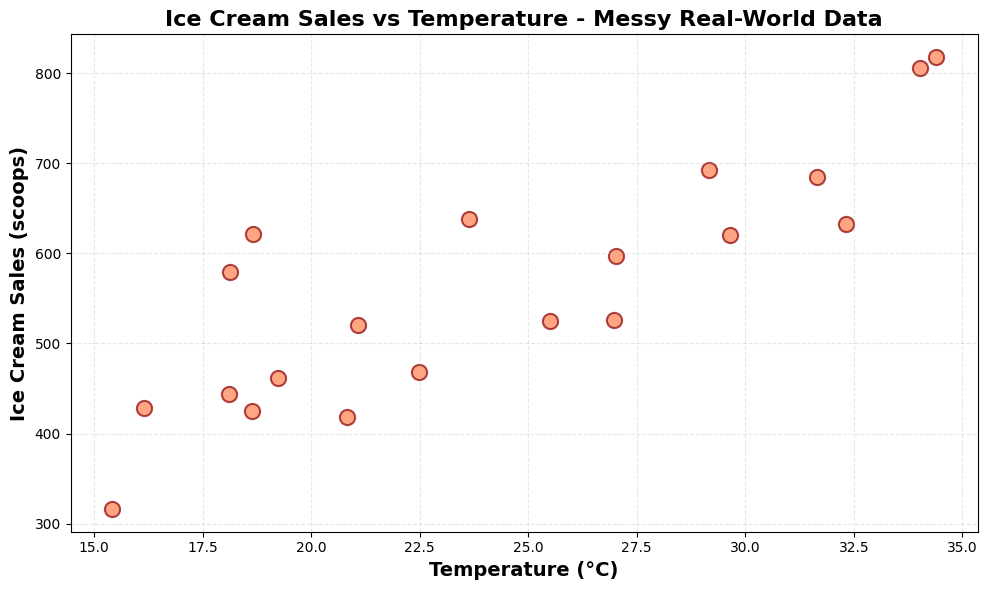

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, sales, color='coral', s=120, alpha=0.7, edgecolors='darkred', linewidths=1.5)
plt.xlabel('Temperature (°C)', fontsize=14, fontweight='bold')
plt.ylabel('Ice Cream Sales (scoops)', fontsize=14, fontweight='bold')
plt.title('Ice Cream Sales vs Temperature - Messy Real-World Data', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Linear Regression Algo

## Compute Gradients

In [8]:
def compute_gradient(x, y, w, b):
    N = len(y)
    y_pred = w * x + b
    error = y_pred - y
    dw = (2/N) * np.dot(error, x)
    db = (2/N) * np.sum(error)
    return dw, db

## New slope and intercept

In [9]:
def find_new_slope_intercept(w, b, alpha):
    dw, db = compute_gradient(temperatures, sales, w, b)
    w_new = w - alpha * dw
    b_new = b - alpha * db
    return w_new, b_new

## Minimize Loss Function

In [24]:
w_init = 0.0
b_init = 0.0
alpha = 0.0001
num_iterations = 10000

def minimize_cost(temperatures, sales, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    x = temperatures
    y = sales

    for i in range(num_iterations):
        y_pred = w * x + b
        cost = (1/len(y)) * np.sum((y_pred - y) ** 2)

        if(i % 100 == 0):
            print(f"Iteration {i+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

        if(cost < 1e-6):
            print("Convergence reached.")
            print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")
            break

        w, b = find_new_slope_intercept(w, b, alpha)

    return w, b

w_final, b_final = minimize_cost(temperatures, sales, w_init, b_init, alpha, num_iterations)

Iteration 1: Cost = 331541.0960, w = 0.0000, b = 0.0000
Iteration 101: Cost = 5900.0035, w = 22.8884, b = 1.0403
Iteration 201: Cost = 5897.8316, w = 22.8827, b = 1.1876
Iteration 301: Cost = 5895.6647, w = 22.8769, b = 1.3347
Iteration 401: Cost = 5893.5028, w = 22.8712, b = 1.4816
Iteration 501: Cost = 5891.3459, w = 22.8655, b = 1.6283
Iteration 601: Cost = 5889.1940, w = 22.8598, b = 1.7749
Iteration 701: Cost = 5887.0470, w = 22.8541, b = 1.9213
Iteration 801: Cost = 5884.9051, w = 22.8484, b = 2.0676
Iteration 901: Cost = 5882.7681, w = 22.8427, b = 2.2137
Iteration 1001: Cost = 5880.6361, w = 22.8370, b = 2.3596
Iteration 1101: Cost = 5878.5090, w = 22.8313, b = 2.5053
Iteration 1201: Cost = 5876.3869, w = 22.8256, b = 2.6509
Iteration 1301: Cost = 5874.2696, w = 22.8199, b = 2.7963
Iteration 1401: Cost = 5872.1573, w = 22.8143, b = 2.9415
Iteration 1501: Cost = 5870.0499, w = 22.8086, b = 3.0865
Iteration 1601: Cost = 5867.9473, w = 22.8030, b = 3.2314
Iteration 1701: Cost = 58

# Plot the best fit line

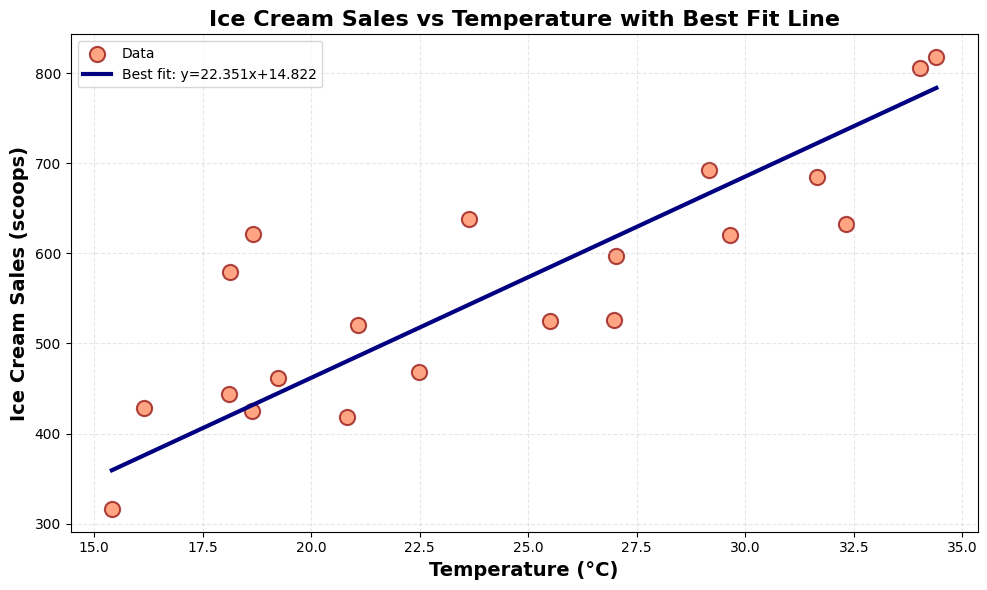

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, sales, color='coral', s=120, alpha=0.7, edgecolors='darkred', linewidths=1.5, label='Data')
x_line = np.linspace(temperatures.min(), temperatures.max(), 100)
y_line = w_final * x_line + b_final
plt.plot(x_line, y_line, color='navy', linewidth=3, label=f'Best fit: y={w_final:.3f}x+{b_final:.3f}')
plt.xlabel('Temperature (°C)', fontsize=14, fontweight='bold')
plt.ylabel('Ice Cream Sales (scoops)', fontsize=14, fontweight='bold')
plt.title('Ice Cream Sales vs Temperature with Best Fit Line', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()